Import the Libraries

In [170]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Extract the features names

In [171]:
# extract the features names
names = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names', skiprows=32, sep=':\s+', engine='python', names=['attr', ''])
names = names['attr']
names = list(names)
names.append('label')
names

['word_freq_make',
 'word_freq_address',
 'word_freq_all',
 'word_freq_3d',
 'word_freq_our',
 'word_freq_over',
 'word_freq_remove',
 'word_freq_internet',
 'word_freq_order',
 'word_freq_mail',
 'word_freq_receive',
 'word_freq_will',
 'word_freq_people',
 'word_freq_report',
 'word_freq_addresses',
 'word_freq_free',
 'word_freq_business',
 'word_freq_email',
 'word_freq_you',
 'word_freq_credit',
 'word_freq_your',
 'word_freq_font',
 'word_freq_000',
 'word_freq_money',
 'word_freq_hp',
 'word_freq_hpl',
 'word_freq_george',
 'word_freq_650',
 'word_freq_lab',
 'word_freq_labs',
 'word_freq_telnet',
 'word_freq_857',
 'word_freq_data',
 'word_freq_415',
 'word_freq_85',
 'word_freq_technology',
 'word_freq_1999',
 'word_freq_parts',
 'word_freq_pm',
 'word_freq_direct',
 'word_freq_cs',
 'word_freq_meeting',
 'word_freq_original',
 'word_freq_project',
 'word_freq_re',
 'word_freq_edu',
 'word_freq_table',
 'word_freq_conference',
 'char_freq_;',
 'char_freq_(',
 'char_freq_[',
 '

Read the data from dataset

In [172]:
#read the dataset
mail_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', names=names)
mail_data

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [173]:
# if there are null values and duplicates this step will drop them
print(mail_data.isnull().sum(),"\n==================")
data = mail_data.dropna()
print(data.duplicated().sum())
data = data.drop_duplicates()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

Split the dataset

In [174]:
# split dataset
X = mail_data.iloc[:, :-1]
y = mail_data.iloc[:, -1]

In [175]:
count = y.value_counts()
print(count)

0    2788
1    1813
Name: label, dtype: int64


Get statistical describe of the dataset

In [176]:
# describe the data
print(mail_data.describe())

       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4601.000000        4601.000000    4601.000000   4601.000000   
mean         0.104553           0.213015       0.280656      0.065425   
std          0.305358           1.290575       0.504143      1.395151   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.420000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4601.000000     4601.000000       4601.000000         4601.000000   
mean        0.312223        0.095901          0.114208            0.105295   
std         0.672513        0.273824          0.391441            0.401071   
min         0.000000        0.

Split the data accordingly Train & Test

In [177]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Cross validation

In [178]:
# max depth values
max_depth_values = range(1, 11)

In [179]:
# check the best mean accuracy value for max depth
from sklearn.model_selection import cross_val_score

for max_depth in max_depth_values:
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=1)
    scores = cross_val_score(model, X, y, cv=10)
    mean_score = scores.mean()
    print("max_depth = ", max_depth, ":", "mean accuracy = ", mean_score*100 )

max_depth =  1 : mean accuracy =  77.20140526266151
max_depth =  2 : mean accuracy =  83.98198623031217
max_depth =  3 : mean accuracy =  86.91676883900783
max_depth =  4 : mean accuracy =  89.04569461473167
max_depth =  5 : mean accuracy =  90.24092238045836
max_depth =  6 : mean accuracy =  90.80590398943696
max_depth =  7 : mean accuracy =  91.15382438932377
max_depth =  8 : mean accuracy =  90.76237857210224
max_depth =  9 : mean accuracy =  91.0448929548241
max_depth =  10 : mean accuracy =  91.04498726775441


Train the Decision Tree Model

In [180]:
# Define the model
model = DecisionTreeClassifier(criterion="entropy", max_depth=7)

In [181]:
# Fit the model on the training data
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

Evaluation of the Model

In [182]:
# Predict the target variable for the test data
y_pred = model.predict(X_test)

In [183]:
# generates the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[511  20]
 [ 61 329]]


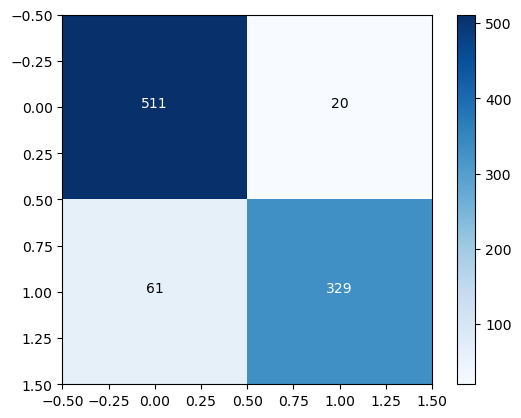

In [184]:
# plotting the confusion matrix
import matplotlib.pyplot as plt
import numpy as np

# Plot confusion matrix
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(set(y_test)))

# Add values to confusion matrix plot
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

In [185]:
from sklearn.metrics import f1_score, recall_score, precision_score
# calculate the accuracy scores
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

In [186]:
print("accuracy score is : ", accuracy)
print("f1 score is : ", f1)
print("recall score is : ", recall)
print("precision score is : ", precision)

accuracy score is :  0.9120521172638436
f1 score is :  0.8903924221921515
recall score is :  0.8435897435897436
precision score is :  0.9426934097421203


In [187]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       531
           1       0.94      0.84      0.89       390

    accuracy                           0.91       921
   macro avg       0.92      0.90      0.91       921
weighted avg       0.91      0.91      0.91       921



Finding false positive rate & true positive rate

In [188]:
# predict the class probabilities for the testing set
y_test_prob = model.predict_proba(X_test)

In [189]:
# calculate the true and positives rates
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_pred, y_test_prob[:, 1])

Plotting the ROC graph for the decition tree

In [190]:
# calculate the area under ROC curve
roc_auc = auc(fpr, tpr)

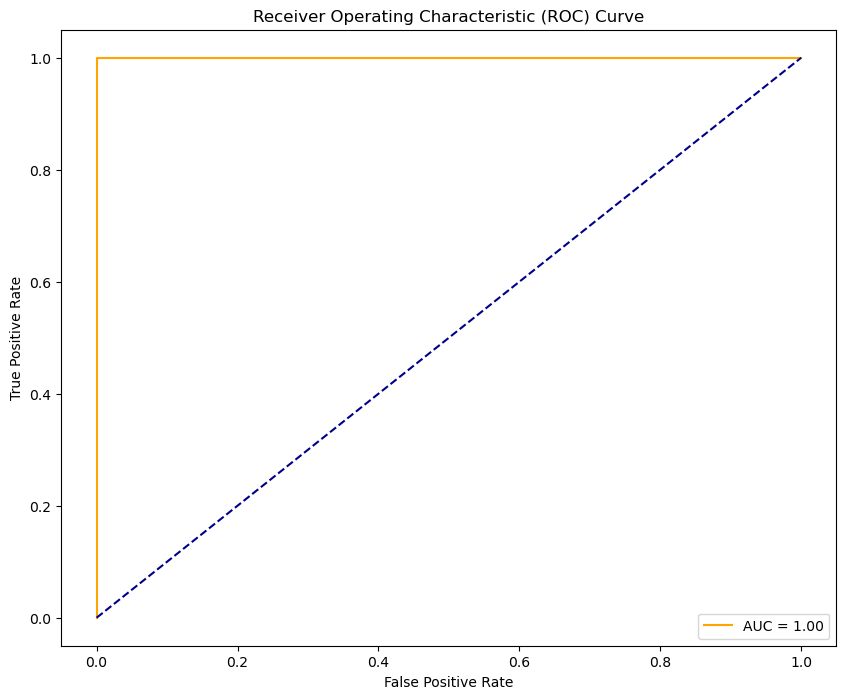

In [191]:
#plot the ROC curve
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='orange', label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()